## Job Recommendation system

### Data Exploration and Visualization

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import nltk
import re
import nltk
import string
import pickle

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer


In [16]:

df = pd.read_csv("dice_com-job_us_sample2.csv")
df.head()

,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,skills
0,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,SEE BELOW
1,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,"linux/unix, network monitoring, incident respo..."
2,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,"Enterprise Solutions Architecture, business in..."
3,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",Please see job description
4,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,"Configuration Management, Developer, Linux, Ma..."


In [17]:
df.shape


(20668, 7)

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df['jobtitle'].value_counts()

jobtitle
Java Developer                                   162
Project Manager                                  138
Network Engineer                                 121
Business Analyst                                 113
Software Engineer                                113
                                                ... 
Hiring full time Java developer Sunnyvale, CA      1
Anaplan Solution Architect / Consultant            1
Desktop Support/Workstation Engineer               1
Project Manager - Lawson ERP                       1
SAP FICO Architect                                 1
Name: count, Length: 15242, dtype: int64

In [20]:
values = pd.DataFrame({'jobtitle': df['jobtitle'].value_counts()})
values

,jobtitle
jobtitle,
Java Developer,162
Project Manager,138
Network Engineer,121
Business Analyst,113
Software Engineer,113
...,...
"Hiring full time Java developer Sunnyvale, CA",1
Anaplan Solution Architect / Consultant,1
Desktop Support/Workstation Engineer,1


In [7]:
df.shape

(20668, 7)

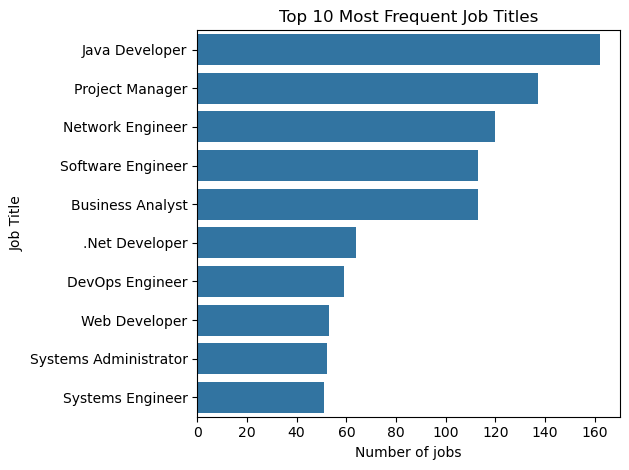

In [33]:
top_titles = df['jobtitle'].value_counts().head(10)

sns.countplot(
    data=df,
    y='jobtitle',
    order=top_titles.index
)

plt.title("Top 10 Most Frequent Job Titles")
plt.xlabel("Number of jobs")
plt.ylabel("Job Title")
plt.tight_layout()


In [21]:
df[df['jobtitle']=='Java Developer']

,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,skills
104,"TRIGYN TECHNOLOGIES, INC.","Contract Corp-To-Corp, Contract Independent, C...",Trigyn's direct financial client has an immedi...,Dice Id : trinj,"Montreal, QC",Java Developer,See job description
120,Princeton Information Ltd,"Full Time, FULL_TIME","The Software Engineer will perform analysis, d...",Dice Id : cxprince,"Herndon, VA",Java Developer,"Access, Analysis, Analytical, Analytical Skill..."
158,Mitchell Martin,"Contract Corp-To-Corp, Contract Independent, C...","Our cli ent, major bank which monitors the mon...",Dice Id : mitchmar1,"New York, NY",Java Developer,"Apache, Business Requirements, Consulting, CSS..."
209,"SIS-Systems Integration Solutions, Inc.",Market,**Local candidates please since client require...,Dice Id : sis,"Sunnyvale, CA",Java Developer,"Contract W2, 12-24 months"
298,Software Guidance & Assistance,"Full Time, Full Time","Software Guidance & Assistance, Inc., (SGA), i...",Dice Id : sgainc,"Wilmington, DE",Java Developer,"Agile, Consulting, Developer, Development, HTT..."
...,...,...,...,...,...,...,...
18516,Infinity Consulting Solutions,Full Time,Risk and Finance Technology (RFT) builds and s...,Dice Id : 10359097,"Houston, TX",Java Developer,Java; WEBLOGIC; J2EE; SQL
18644,"HTC Global Services, Inc.","Full Time, Contract W2","HTC – A brief profileEstablished in 1990, HTC ...",Dice Id : htcinc,"Madison, WI",Java Developer,"Java,Struts, Maven, JavaScript, JBOSS,Hibernate"
18839,Dice Demo - National Accounts,Full Time,** This is a test job. Please do not apply. **...,Dice Id : dtstnag,"New York, NY",Java Developer,"Java, JavaScript, J2EE, Linux, HTML"
19998,Anveta Inc,"Contract Corp-To-Corp, Contract W2, C2H Corp-T...",our client looking for Sr.java developer who w...,Dice Id : 10312854,"San Jose, CA",Java Developer,"java,Healthcare"


### Data Preprocessing

In [22]:
df.isnull().sum()

company                      49
employmenttype_jobstatus    208
jobdescription                0
jobid                         0
joblocation_address           3
jobtitle                      0
skills                       42
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

company                     0
employmenttype_jobstatus    0
jobdescription              0
jobid                       0
joblocation_address         0
jobtitle                    0
skills                      0
dtype: int64

### Feature Engineering

In [25]:
df['job_tags'] =   df['jobtitle'] + ' ' + df['company'] + ' ' + df['employmenttype_jobstatus'] + ' ' + df['jobdescription'] + ' ' + df['joblocation_address'] + ' ' + df['skills']

In [28]:
df['job_tags'][0]


'AUTOMATION TEST ENGINEER Digital Intelligence Systems, LLC C2H Corp-To-Corp, C2H Independent, C2H W2, 3 MONTHS TO HIRE Looking for Selenium engineers...must have solid java coding skills\xa0I have several openings some 3 month to hire some 6...must be able to go PERM\xa0\xa0This can be someone with 0-5 years of experience. Most important qualities are Eagerness and Aptitude. POSITION PURPOSE - Do you want to be on the forefront of cutting edge technology, introduce solutions to problems that didn’t exist before, and have the ability to see the result of your successes? Our client assures growth by collaborating with development teams and creating tools that aid engineers in building, testing, debugging, and releasing software. We touch millions of users by increasing the rate of development and ensuring our products are methodically tested. We are experts in software health, testability, and sustainability. As a Software Engineer in Test at our client, you can expect to build flexible

In [ ]:
ps = PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Stopwords

In [30]:


# Download the stopwords dataset (if not already downloaded)
nltk.download('stopwords')

# Get English stopwords
stop_words = stopwords.words('english')

# Print stopwords
print("Stopwords in English:")
print(stop_words)


Stopwords in English:
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Punctuation marks

In [ ]:


# Get punctuation marks
punctuation_marks = string.punctuation

# Print punctuation marks
print("\nPunctuation marks:")
print(punctuation_marks)



Punctuation marks:
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [17]:
# import nltk
# nltk.download('punkt')

### Delete duplicated job title from the csv file dataset

In [18]:
df['jobtitle'][0]

'AUTOMATION TEST ENGINEER'

In [19]:
df['jobtitle'].duplicated().sum()

np.int64(5354)

In [20]:
df_no_duplicates = df.drop_duplicates(subset=['jobtitle'])

In [21]:
data = df_no_duplicates.iloc[0:10000]

In [22]:
data['jobtitle'].duplicated().sum()

np.int64(0)

In [23]:
data.head(4)

,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,skills,job_tags
0,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,SEE BELOW,AUTOMATION TEST ENGINEER Digital Intelligence ...
1,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,"linux/unix, network monitoring, incident respo...",Information Security Engineer University of Ch...
2,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,"Enterprise Solutions Architecture, business in...","Business Solutions Architect Galaxy Systems, I..."
3,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",Please see job description,"Java Developer (mid level)- FT- GREAT culture,..."


In [24]:
def cleaning(txt):
#     step 1
    txt = re.sub(r'[^a-zA-Z0-9\s]','',txt)
#     step 2
    tokens = nltk.word_tokenize(txt.lower())
    # step 3 and 5
    stemming = [ps.stem(w) for w in tokens if w not in stopwords.words('english')]
    return " ".join(stemming)

In [25]:
# data0['job_tags'] = data0['job_tags'].astype(str).apply(lambda x: cleaning(x))

In [26]:
data['job_tags1'] = data['job_tags'].astype(str).apply(lambda x: cleaning(x))



LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Owner/nltk_data'
    - 'c:\\Users\\Owner\\AppData\\Local\\Programs\\Python\\Python313\\nltk_data'
    - 'c:\\Users\\Owner\\AppData\\Local\\Programs\\Python\\Python313\\share\\nltk_data'
    - 'c:\\Users\\Owner\\AppData\\Local\\Programs\\Python\\Python313\\lib\\nltk_data'
    - 'C:\\Users\\Owner\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
data.head()


,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,skills,job_tags,job_tags1
0,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,SEE BELOW,AUTOMATION TEST ENGINEER Digital Intelligence ...,autom test engin digit intellig system llc c2h...
1,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,"linux/unix, network monitoring, incident respo...",Information Security Engineer University of Ch...,inform secur engin univers chicagoit servic fu...
2,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,"Enterprise Solutions Architecture, business in...","Business Solutions Architect Galaxy Systems, I...",busi solut architect galaxi system inc full ti...
3,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",Please see job description,"Java Developer (mid level)- FT- GREAT culture,...",java develop mid level ft great cultur modern ...
4,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,"Configuration Management, Developer, Linux, Ma...",DevOps Engineer Matrix Resources Full Time Mid...,devop engin matrix resourc full time midtown b...


In [ ]:
data['job_tags1'][0]

'autom test engin digit intellig system llc c2h corptocorp c2h independ c2h w2 3 month hire look selenium engineersmust solid java code skill sever open 3 month hire 6must abl go perm someon 05 year experi import qualiti eager aptitud posit purpos want forefront cut edg technolog introduc solut problem didnt exist abil see result success client assur growth collabor develop team creat tool aid engin build test debug releas softwar touch million user increas rate develop ensur product method test expert softwar health testabl sustain softwar engin test client expect build flexibl scalabl solut work complex challeng largescal comput util skill data structur object orient program major task respons key account lead contribut engin effort plan execut deliveri solv complex engin problem tool test design build advanc autom test framework build tool help develop measur increas veloc adopt best practic softwar health test sustain analyz break complex softwar system collabor develop team improv

## Vectorization

In [ ]:
cv = CountVectorizer(max_features=10000,stop_words='english')

In [ ]:

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
# array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
#        'this'], ...)
print(X.toarray())


['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [ ]:

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_features=10000,stop_words='english')

In [ ]:
vectors = cv.fit_transform(data['job_tags1'].tolist()).toarray()

In [ ]:
vectors.shape

(10000, 10000)

In [ ]:
cv.get_feature_names_out().view()

array(['000', '000000', '01', ..., 'zoom', 'zulili', 'zvm'], dtype=object)

In [ ]:
similarity = cosine_similarity(vectors)

In [ ]:
similarity[0]

array([1.        , 0.17357979, 0.29902168, ..., 0.18410203, 0.19368791,
       0.2521638 ])

In [ ]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

[(4651, 0.6089806149710613),
 (9010, 0.5971177842095622),
 (2191, 0.5967031229755201),
 (6141, 0.585496657705512),
 (2640, 0.5794881515001344)]

In [ ]:
data.head(2)

,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,skills,job_tags,job_tags1
0,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,SEE BELOW,AUTOMATION TEST ENGINEER Digital Intelligence ...,autom test engin digit intellig system llc c2h...
1,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,"linux/unix, network monitoring, incident respo...",Information Security Engineer University of Ch...,inform secur engin univers chicagoit servic fu...


In [ ]:
def recommend(job):
    job_index = data[data['jobtitle']== job].index[0]
    distances = similarity[job_index]
    jobs_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:8]

    for i in jobs_list:
        print(data.iloc[i[0]].jobtitle+'\n','  Location  ',data.iloc[i[0]].joblocation_address)

# recommend("Technical Lead Java")

In [ ]:
recommend("Sr. Systems Test Engineer (PERM)")

Senior Mainframe Test Analyst
   Location   West Sacramento, CA
Team Leader-Testing & QA Analyst
   Location   Manhattan, NY
IT Test Automation Engineer
   Location   Orlando, FL
Sr. Software QA Tester
   Location   Boston, MA
Cyber Test Automation Engineer 3/4 - TS/SCI with Poly
   Location   Chantilly, VA
Test Automation/Load Testing Contractor
   Location   Southlake, TX
Software Test Engineer
   Location   Manchester, NH


In [ ]:
data['jobtitle'][0:50]

,jobtitle
0,AUTOMATION TEST ENGINEER
1,Information Security Engineer
2,Business Solutions Architect
3,"Java Developer (mid level)- FT- GREAT culture,..."
4,DevOps Engineer
5,SAP FICO Architect
6,Network Engineer
7,Sr. Web Application Developer (Cloud Team) - C...
8,Front End Developer
9,Application Support Engineer


In [ ]:
data.shape

(10000, 9)

## Convert into Pickle

In [ ]:

pickle.dump(data.to_dict(),open('Job_recom.pkl','wb'))

### similarity matrix save

In [ ]:
pickle.dump(similarity,open('job_similiar.pkl','wb'))